In [1]:
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

## Eigendecomposition

In [3]:
I = np.identity(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
u = np.array([3,-3,7])
u

array([ 3, -3,  7])

In [5]:
Iu = np.dot(I,u)

In [6]:
Iu

array([ 3., -3.,  7.])

In [7]:
v = np.array([3,1])

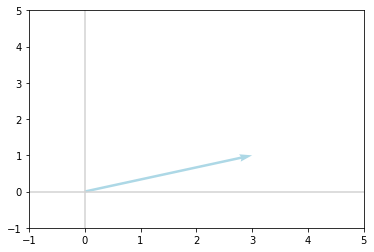

In [8]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [9]:
b = np.array([2,4])

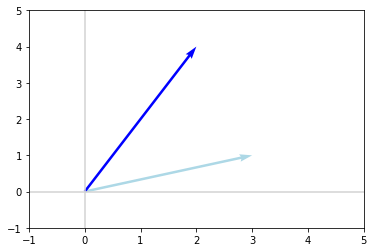

In [10]:
plot_vectors([v,b], ['lightblue','blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: **Applying an identity matrix does not transform the vector**:

In [11]:
I = np.identity(2)
I

array([[1., 0.],
       [0., 1.]])

In [12]:
Iv = I @ v
Iv

array([3., 1.])

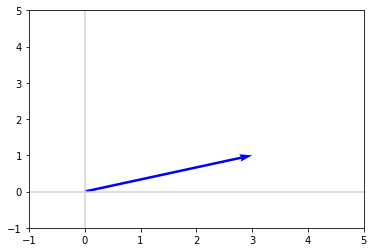

In [13]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [14]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [15]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

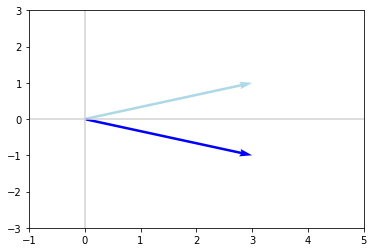

In [16]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

In [17]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [18]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

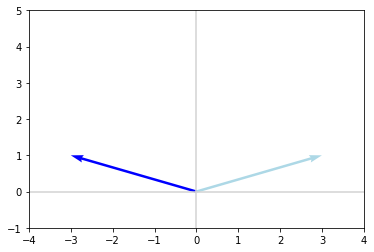

In [19]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

In [20]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [21]:
Av = np.dot(A, v)
Av

array([1, 4])

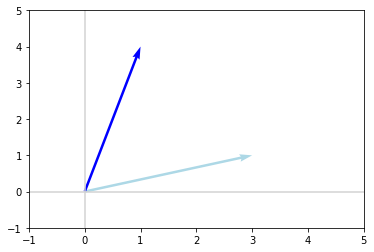

In [22]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

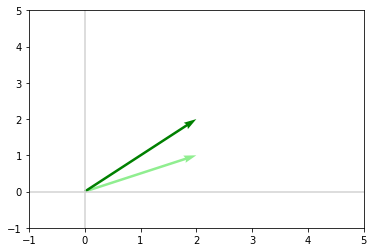

In [23]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector):

In [24]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [25]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [26]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [27]:
# no changes after multiplication with identical matrix I:
IV = np.dot(I, V)
IV

matrix([[ 3.,  2., -3., -1.],
        [ 1.,  1., -1.,  1.]])

In [28]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [29]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [30]:
vectorfy(V, 0)

array([3, 1])

In [31]:
vectorfy(V, 0) == v

array([ True,  True])

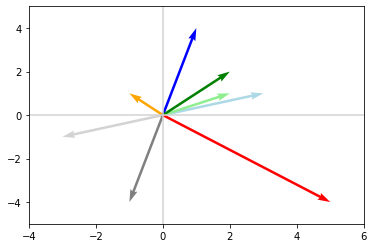

In [32]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with **eigenvectors** and **eigenvalues**...

## Egenvectors and Eigenvalues

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [33]:
A

array([[-1,  4],
       [ 2, -2]])

In [34]:
lambdas, V = np.linalg.eig(A) 

The matrix contains as many eigenvectors as there are columns of A: 

In [35]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [36]:
lambdas

array([ 1.37228132, -4.37228132])

In [37]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [38]:
lambduh = lambdas[0]
lambduh

1.3722813232690143

In [39]:
Av = A @ v
Av

array([1.18031462, 0.70000958])

In [40]:
lambduh_v = lambduh * v
lambduh_v

array([1.18031462, 0.70000958])

In [41]:
lambduh_v == Av

array([ True,  True])

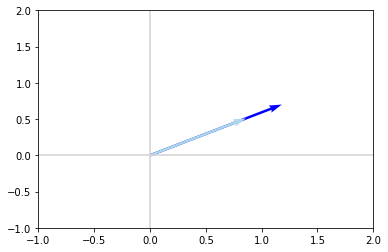

In [42]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [43]:
v2 = V[:,1]
lambda2 = lambdas[1]

Av2 = A @ v2
Av2

array([ 3.34281692, -2.81822977])

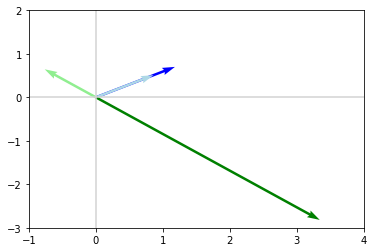

In [44]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

In [45]:
D = np.random.randint(5, 25, [4, 4])
D

array([[10, 16, 14, 23],
       [ 9,  9, 14, 12],
       [ 6, 15, 12,  8],
       [ 6,  8, 16,  7]])

In [46]:
np.linalg.det(D)

-4485.999999999999

In [47]:
np.linalg.matrix_rank(D)

4

In [48]:
lambdas, V = np.linalg.eig(D) 

In [49]:
lambdas

array([44.47108216+0.j       , -5.61450551+0.j       ,
       -0.42828832+4.2170299j, -0.42828832-4.2170299j])

In [50]:
V

array([[-0.6580357 +0.j        , -0.8028003 +0.j        ,
         0.79507581+0.j        ,  0.79507581-0.j        ],
       [-0.47189882+0.j        ,  0.33976462+0.j        ,
         0.14141496-0.16034506j,  0.14141496+0.16034506j],
       [-0.4362615 +0.j        , -0.21568702+0.j        ,
        -0.34446395-0.14632175j, -0.34446395+0.14632175j],
       [-0.39239829+0.j        ,  0.43994409+0.j        ,
        -0.24919234+0.34638626j, -0.24919234-0.34638626j]])

In [51]:
D @ V[:,3]

array([-0.34052168-3.35285846j,  0.61561354-0.66502502j,
        0.7645731 +1.38994687j, -1.35399505+1.19920473j])

In [52]:
lambdas[3] * V[:,3]

array([-0.34052168-3.35285846j,  0.61561354-0.66502502j,
        0.7645731 +1.38994687j, -1.35399505+1.19920473j])

## Matrix Determinants
map *square* matrix to a scalar

If matrix determinant equals to zero, we cannot invert this matrix.

**Which would mean that our matrix is singular, i.e. it contains linearly-dependent columns**.

In [53]:
np.linalg.det(V)

(-2.6322544778868874e-17-0.4741848114302282j)

In [54]:
np.linalg.inv(V)

array([[-0.35591274+4.21794371e-17j, -0.56214074-1.16278372e-16j,
        -0.66179454-2.12796650e-17j, -0.53977727+1.89997413e-16j],
       [-0.45232809+0.00000000e+00j,  1.13165566-1.81277069e-16j,
        -0.73409188-1.20851379e-16j,  0.21375497+1.20851379e-16j],
       [ 0.2532259 -2.67827348e-01j,  0.3387003 +7.93399321e-01j,
        -0.64447541+3.72307401e-01j, -0.1154545 -9.18932714e-01j],
       [ 0.2532259 +2.67827348e-01j,  0.3387003 -7.93399321e-01j,
        -0.64447541-3.72307401e-01j, -0.1154545 +9.18932714e-01j]])

In [55]:
H = np.random.randint(-90, 190, [10, 10])
H

array([[ 91,  56, 103,  -9, -40, 158,  63,  99, 157,  65],
       [ 24, -73, -44,  55,   3, 124, -10,  93, 188, -23],
       [ 37, 187, 130, 186, 181,  85, 176,  39, -21, 183],
       [ -4, 133, -24,  -6, 153, -30,  58, 155,  92, -33],
       [ 34, -15, -87, -26, -39, -66,  46,  -9,  72, 105],
       [ 78, 131,  -2,  66,  26,  90, 182, 146, -35, -59],
       [ 58,  16,  45, -12, -36, -37, 104, -36, -43, -44],
       [147, -14, -15, 176,  43,  -3, 150,  -5,  63, -89],
       [180,  16,  60,  -8,  16, 139,   3,  85, 146, -88],
       [-56, -73, 121, -66,  65,  -2,  50, -11,  14,  18]])

In [56]:
np.linalg.det(H)

-8.323204161816688e+21

In [57]:
np.linalg.matrix_rank(H)

10

In [58]:
H_inv = np.linalg.inv(H)

In [59]:
C = np.random.randint(-2, 2, [100, 100])
C

array([[ 1, -1, -1, ..., -2,  0,  1],
       [ 0,  0,  1, ...,  1,  1, -1],
       [ 0,  1,  1, ...,  1,  1, -2],
       ...,
       [ 1,  0, -1, ..., -1,  0,  1],
       [-2, -1,  1, ...,  1, -1, -2],
       [-1, -1,  0, ..., -2,  0,  1]])

In [60]:
np.linalg.det(C)

-4.820599799001439e+84

In [61]:
np.linalg.inv(C)

array([[ 0.05604473, -0.04056172,  0.00875343, ..., -0.01262648,
        -0.0403383 , -0.0524769 ],
       [-0.00494587, -0.14707185, -0.08271048, ...,  0.0717113 ,
         0.02597573, -0.11688319],
       [ 0.14207723,  0.09415618,  0.04793811, ...,  0.05620408,
         0.01310505, -0.07590754],
       ...,
       [ 0.12480082, -0.17911637, -0.14613338, ...,  0.0621721 ,
         0.04794788, -0.17045917],
       [ 0.01691729, -0.07261182,  0.01220419, ...,  0.03252095,
         0.05584857, -0.01543713],
       [ 0.17663422, -0.10436566, -0.11561767, ...,  0.09520628,
        -0.00729911, -0.13213745]])

## Relationship between Determinants & Eigenvalues

Determinant = product of all Eigenvalues

i.e., if any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero. 

In [62]:
X = np.random.randint(-2, 5, [3, 3])
X

array([[-2,  3,  1],
       [-2, -2,  2],
       [ 1, -1, -1]])

In [63]:
lambdas, V = np.linalg.eig(X) 

In [64]:
X_det = np.linalg.det(X)
X_det

-3.999999999999999

In [65]:
lambdas

array([-2.35313117+2.84259867j, -2.35313117-2.84259867j,
       -0.29373766+0.j        ])

In [66]:
np.prod(lambdas)

(-3.9999999999999982+0j)

In [67]:
np.round(X_det, 3) == np.round(np.prod(lambdas), 3)

True

In [68]:
B = np.random.randint(-12, 32, [6, 6])
B

array([[ -7,   5,  -8,   3,  -7,  30],
       [-12,  -8,   8,   2,  28,   1],
       [-10,  10, -12,  11,  -7,  19],
       [-10,  -1,  -6,  18,  14,  30],
       [ -7,  -7,  24,  29,  25,  22],
       [ -8,   4,  10, -12,  18,  29]])

In [69]:
B_det = np.linalg.det(B)
B_det

-54300372.000000104

In [70]:
# get eigenvalues for matrix B
lambdas = np.linalg.eigvals(B)

In [71]:
lambdas

array([ 55.04178625 +0.j        , -12.49111737+22.62897441j,
       -12.49111737-22.62897441j,  -5.39666571 +0.j        ,
        10.1685571 +13.04676976j,  10.1685571 -13.04676976j])

In [72]:
np.prod(lambdas)

(-54300372.00000028+0j)

## Eigendecomposition
**Only for squared matrices**

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [73]:
A = np.array([[4,2],[-5,-3]])
A

array([[ 4,  2],
       [-5, -3]])

In [75]:
lambdas, V = np.linalg.eig(A)
print(lambdas)
print(V)

[ 2. -1.]
[[ 0.70710678 -0.37139068]
 [-0.70710678  0.92847669]]


In [77]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [78]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $A = V \Lambda V^{-1}$: 

In [79]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [80]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [81]:
lambdas, Q = np.linalg.eig(A)

In [82]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [83]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$: 

In [84]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [85]:
Q @ Q.T

array([[1., 0.],
       [0., 1.]])

In [86]:
Q.T @ Q

array([[1., 0.],
       [0., 1.]])

In [88]:
D = np.random.randint(-25, 25, [4, 4])
D

array([[ 17, -16,  23,  24],
       [-15,  24, -10,  -4],
       [ -6, -10, -22,   7],
       [ -3,   3,  22, -19]])

In [87]:
def symmetrize(a):
    """
    Return a symmetrized version of NumPy array a.

    Values 0 are replaced by the array value at the symmetric
    position (with respect to the diagonal), i.e. if a_ij = 0,
    then the returned array a' is such that a'_ij = a_ji.

    Diagonal values are left untouched.

    a -- square NumPy array, such that a_ij = 0 or a_ji = 0, 
    for i != j.
    """
    return a + a.T - np.diag(a.diagonal())

### Special Case: Symmetrical Matrix D

In [90]:
Dsymm = symmetrize(D)
Dsymm

array([[ 17, -31,  17,  21],
       [-31,  24, -20,  -1],
       [ 17, -20, -22,  29],
       [ 21,  -1,  29, -19]])

In [99]:
lambdas, Q = np.linalg.eig(Dsymm)
Q

array([[ 0.63145821, -0.13052789,  0.72521799,  0.24141637],
       [-0.62942839, -0.22487242,  0.27790564,  0.68994257],
       [ 0.3545861 , -0.69733418, -0.53848043,  0.31310153],
       [ 0.28168978,  0.66792208, -0.32690389,  0.6063537 ]])

In [100]:
Q.T @ Q

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.77555756e-16],
       [ 0.00000000e+00,  1.00000000e+00, -1.66533454e-16,
         1.66533454e-16],
       [ 0.00000000e+00, -1.66533454e-16,  1.00000000e+00,
         5.27355937e-16],
       [-2.77555756e-16,  1.66533454e-16,  5.27355937e-16,
         1.00000000e+00]])

In [102]:
Lambda = np.diag(lambdas)

In [103]:
Q.shape, Lambda.shape

((4, 4), (4, 4))

In [104]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[ 17., -31.,  17.,  21.],
       [-31.,  24., -20.,  -1.],
       [ 17., -20., -22.,  29.],
       [ 21.,  -1.,  29., -19.]])

### Normal Case: Non-symmetrical Matrix

In [107]:
Z = np.random.random([4, 4])
Z

array([[0.93561383, 0.8469988 , 0.41065945, 0.77009547],
       [0.5571295 , 0.52712695, 0.44197799, 0.72806496],
       [0.56109747, 0.10235621, 0.19950992, 0.70001845],
       [0.01485532, 0.32417873, 0.26033828, 0.56977657]])

In [108]:
np.linalg.det(Z)

0.03131042184460341

In [109]:
lambdas, V = np.linalg.eig(Z)
lambdas

array([ 1.92189819+0.j        ,  0.47096768+0.j        ,
       -0.0804193 +0.16770236j, -0.0804193 -0.16770236j])

In [110]:
Lambda = np.diag(lambdas)
Lambda

array([[ 1.92189819+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.47096768+0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.0804193 +0.16770236j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.0804193 -0.16770236j]])

In [111]:
Vinv = np.linalg.inv(V)
Vinv

array([[-5.47259409e-01+5.28879099e-17j, -5.50002213e-01-0.00000000e+00j,
        -3.94349178e-01-0.00000000e+00j, -8.12006127e-01+4.36448813e-17j],
       [-4.50536330e-01-3.34659558e-17j,  6.75124657e-04+0.00000000e+00j,
         3.44134356e-01+0.00000000e+00j,  1.06836597e+00-3.34659558e-17j],
       [-1.24128425e-01-5.60642003e-01j, -1.14969625e-01+1.01553492e+00j,
         5.10378440e-01-1.72069682e-02j, -1.46715403e-01-4.92446752e-01j],
       [-1.24128425e-01+5.60642003e-01j, -1.14969625e-01-1.01553492e+00j,
         5.10378440e-01+1.72069682e-02j, -1.46715403e-01+4.92446752e-01j]])

In [112]:
np.dot(V, np.dot(Lambda, Vinv))

array([[0.93561383-6.26708060e-17j, 0.8469988 +9.76036913e-19j,
        0.41065945-6.99115648e-19j, 0.77009547-5.22078084e-17j],
       [0.5571295 -5.72295962e-17j, 0.52712695-1.20846717e-18j,
        0.44197799+7.09785452e-20j, 0.72806496-4.12795650e-17j],
       [0.56109747-1.95924161e-17j, 0.10235621+4.96646591e-18j,
        0.19950992-6.53547204e-18j, 0.70001845-2.39629728e-17j],
       [0.01485532-3.35867523e-17j, 0.32417873-2.63945387e-19j,
        0.26033828-1.62760916e-18j, 0.56977657-2.90665089e-17j]])

In [113]:
V @ Lambda @ Vinv

array([[0.93561383-6.12384877e-17j, 0.8469988 -7.48823351e-19j,
        0.41065945+1.10935814e-18j, 0.77009547-5.20300192e-17j],
       [0.5571295 -5.58214689e-17j, 0.52712695+1.35768396e-18j,
        0.44197799-5.31175451e-19j, 0.72806496-4.12761964e-17j],
       [0.56109747-1.84877540e-17j, 0.10235621+3.68337792e-18j,
        0.19950992+2.48401570e-18j, 0.70001845-2.65747849e-17j],
       [0.01485532-3.46847302e-17j, 0.32417873-8.52789353e-19j,
        0.26033828+1.95688063e-19j, 0.56977657-2.83899011e-17j]])

In [118]:
J = np.random.randint(-1,5,[3, 3])
J

array([[ 3, -1,  4],
       [ 2,  3,  2],
       [ 0,  2, -1]])

In [119]:
np.linalg.matrix_rank(J)

3

In [120]:
lambdas, V = np.linalg.eig(J)
Lambda = np.diag(lambdas)
Vinv = np.linalg.inv(V)

In [121]:
V @ Lambda @ Vinv

array([[ 3.00000000e+00, -1.00000000e+00,  4.00000000e+00],
       [ 2.00000000e+00,  3.00000000e+00,  2.00000000e+00],
       [-3.10047957e-16,  2.00000000e+00, -1.00000000e+00]])